In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


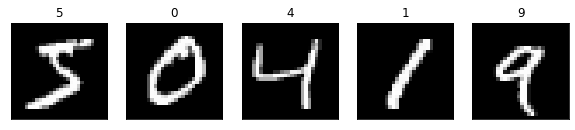

In [ ]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
to_categorical(2, num_classes=10)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 3925      
                                                                 
 dense_3 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [ ]:
model.fit(X_train, y_train, epochs=20, 
          validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6523 - acc: 0.5085 - val_loss: 1.2574 - val_acc: 0.6469
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0808 - acc: 0.6921 - val_loss: 0.9524 - val_acc: 0.7259
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9203 - acc: 0.7321 - val_loss: 0.8920 - val_acc: 0.7338
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8584 - acc: 0.7376 - val_loss: 0.8690 - val_acc: 0.7205
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8226 - acc: 0.7454 - val_loss: 0.7658 - val_acc: 0.7657
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8081 - acc: 0.7491 - val_loss: 0.7940 - val_acc: 0.7617
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7863 - acc: 0.7618 - val_loss: 0.7650 - val_acc: 0.7673
Epoch 8/20
1875/1875 [==============================] - 5s 3ms

In [ ]:
predictions = model.predict(X_test)
print(predictions)

313/313 [==============================] - 0s 1ms/step
[[9.8744128e-04 3.8320222e-04 2.2249902e-03 ... 9.3165982e-01
  1.6813955e-03 5.7449073e-02]
 [1.1681563e-02 1.8348860e-03 6.9388753e-01 ... 1.8211720e-04
  1.4530364e-03 2.6194617e-05]
 [7.9035181e-06 8.8299340e-01 2.6570868e-02 ... 3.3162357e-03
  6.3494779e-02 8.2444530e-03]
 ...
 [4.8349919e-03 3.3467720e-04 4.5547186e-04 ... 1.8198714e-02
  4.8809309e-02 4.4582677e-01]
 [2.6331877e-02 2.7905072e-03 3.4935204e-03 ... 5.0036953e-04
  7.3720104e-01 1.3241857e-02]
 [1.3184425e-04 9.0398202e-03 2.8078131e-02 ... 1.7630071e-05
  8.7878034e-03 3.5211301e-04]]


In [ ]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 8 6]


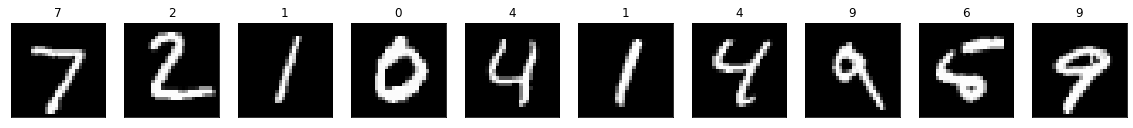

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()